In [1]:
import sys
!{sys.executable} -m pip install requests beautifulsoup4


  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.11.12-py3-none-any.whl.metadata (2.5 kB)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached beautifulsoup4-4.14.2-py3-none-any.whl (106 kB)
Using cached certifi-2025.11.12-py3-none-any.whl (159 kB)
Using cached idna-3.11-py3-none-any.whl (71 kB)
Using cached soupsieve-2.8-py3-none-any.whl (36 kB)
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
df = pd.read_csv('agriculture_crop_yield.csv')
df.head()



,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [2]:
import pandas as pd

df = pd.read_csv('agriculture_crop_yield.csv')
df.info()   # Summary of columns, data types, missing values
print("Shape:", df.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB
Shape: (1000000, 10)


In [3]:
# Check for missing values in each column
df.isnull().sum()


Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [4]:
# Summary statistics of numeric columns
df.describe()


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


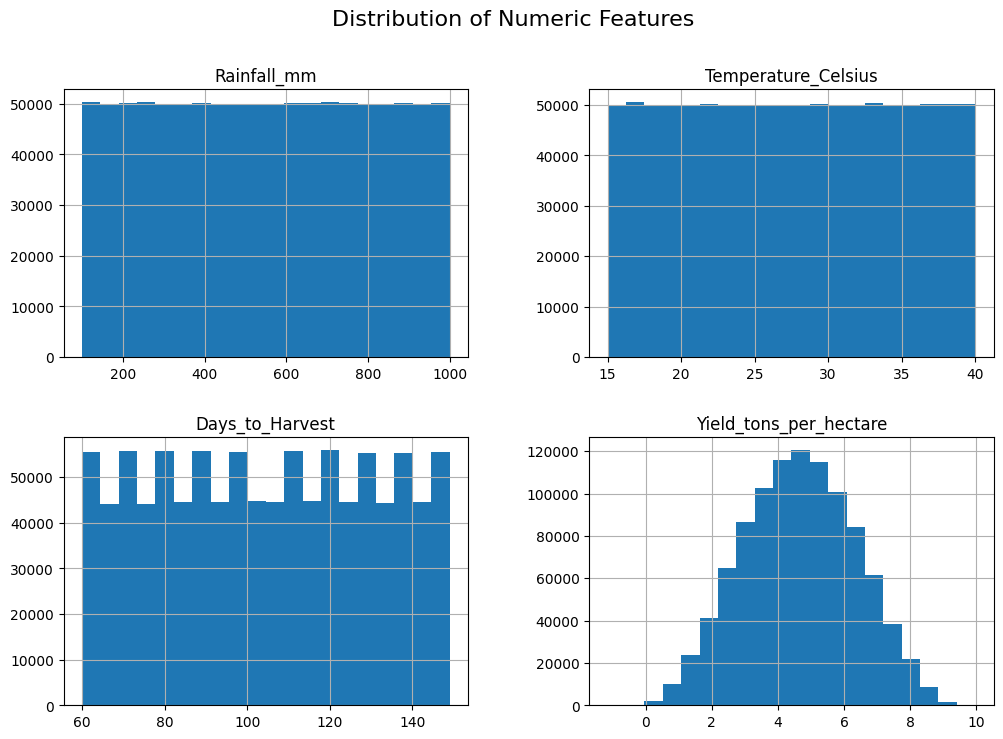

In [5]:
import matplotlib.pyplot as plt

numeric_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Days_to_Harvest', 'Yield_tons_per_hectare']

df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()



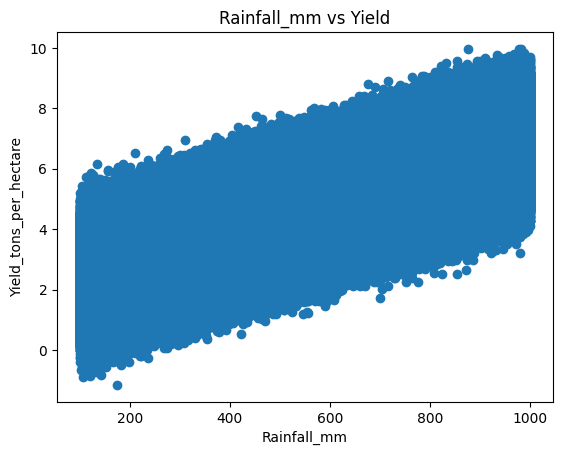

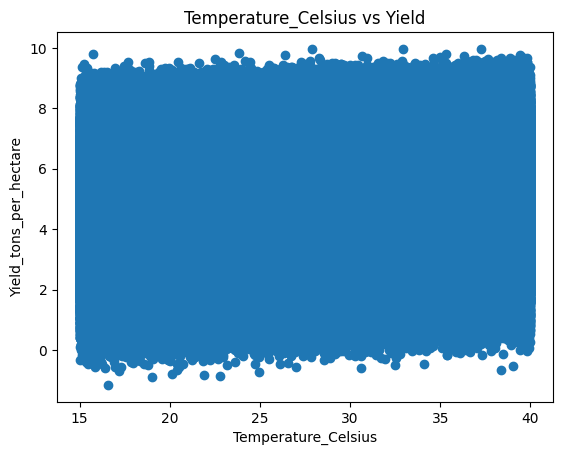

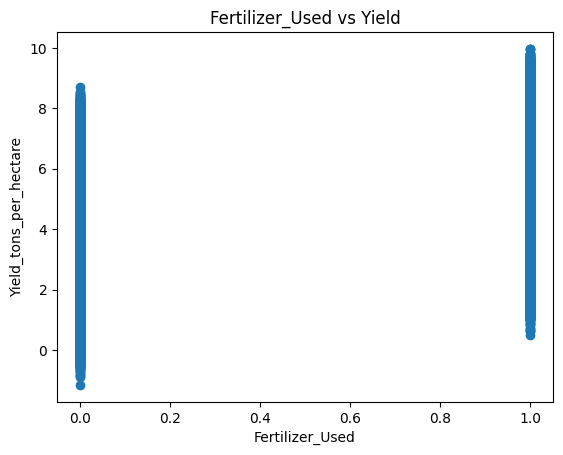

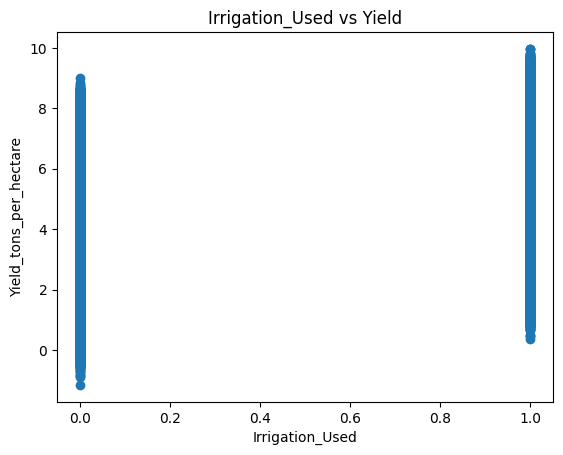

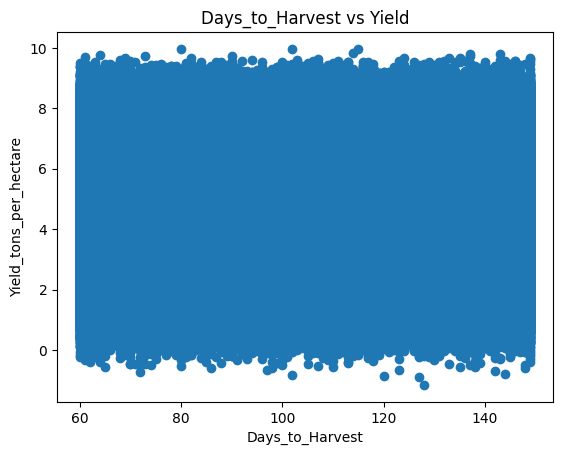

In [6]:
for col in ['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Days_to_Harvest']:
    plt.scatter(df[col], df['Yield_tons_per_hectare'])
    plt.xlabel(col)
    plt.ylabel('Yield_tons_per_hectare')
    plt.title(f'{col} vs Yield')
    plt.show()


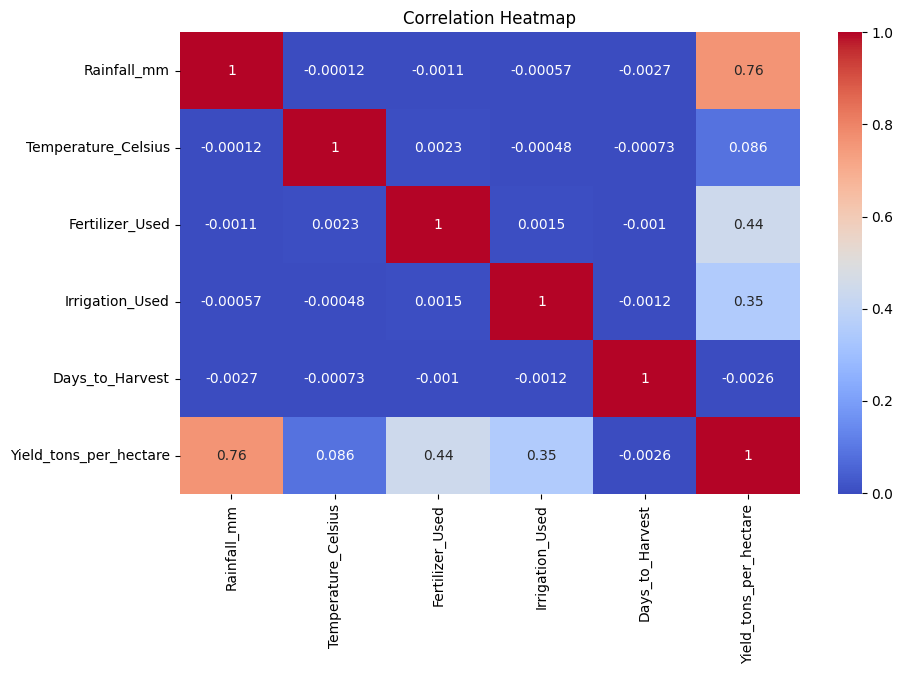

In [7]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [8]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition'], drop_first=True)

# Check the new dataframe
df_encoded.head()


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_North,Region_South,Region_West,Soil_Type_Clay,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,992.673282,18.026142,True,True,140,8.527341,False,True,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,1.127443,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,986.866331,16.644190,False,True,146,6.517573,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,730.379174,31.620687,True,True,110,7.248251,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Target variable
y = df_encoded['Yield_tons_per_hectare']

# Features (all other columns except target)
X = df_encoded.drop('Yield_tons_per_hectare', axis=1)


In [10]:
from sklearn.preprocessing import StandardScaler

# List numeric columns to scale
numeric_features = ['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Days_to_Harvest']

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Check first 5 rows
X.head()


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,1.335747,0.023821,-0.99988,1.001019,0.674477,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False
1,1.703634,-1.312747,1.00012,1.001019,1.368028,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False
2,-1.546977,0.317020,-0.99988,-0.998983,0.057988,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,1.681287,-1.504137,-0.99988,1.001019,1.599212,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False
4,0.694233,0.569997,1.00012,1.001019,0.212110,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False


In [11]:
from sklearn.model_selection import train_test_split

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 800000
Testing samples: 200000


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate
print("Linear Regression Performance:")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2 Score:", r2_score(y_test, y_test_pred))


Linear Regression Performance:
Train RMSE: 0.5004012552570176
Test RMSE: 0.5007760662930835
R2 Score: 0.9130137709140372


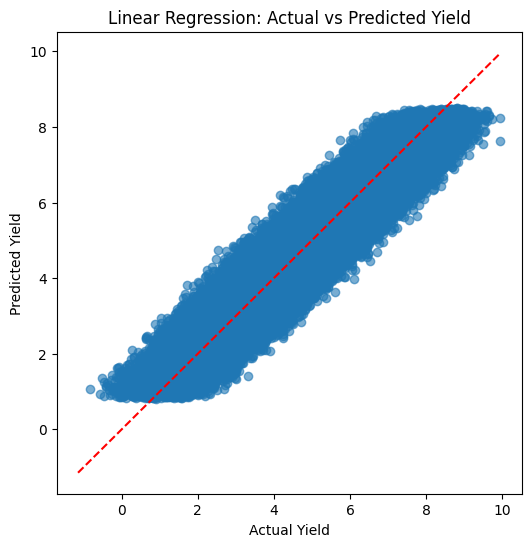

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression: Actual vs Predicted Yield")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()


In [14]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_test_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Performance:")
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_dt)))
print("R2 Score:", r2_score(y_test, y_test_pred_dt))


Decision Tree Performance:
Test RMSE: 0.7290490606963645
R2 Score: 0.815635676108258


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib

# Train Random Forest (was missing before)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # THIS is crucial

# Predict on test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Performance:")
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))

# Pick best model based on RMSE
rmse_scores = {
    'Linear Regression': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Decision Tree': np.sqrt(mean_squared_error(y_test, y_test_pred_dt)),
    'Random Forest': np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
}

best_model_name = min(rmse_scores, key=rmse_scores.get)
print("Best Model:", best_model_name)

best_model = {'Linear Regression': lr_model,
              'Decision Tree': dt_model,
              'Random Forest': rf_model}[best_model_name]

# Save the best model
joblib.dump(best_model, 'best_yield_model.pkl')
print("Best model saved as 'best_yield_model.pkl'")

# Save scaler as well (if using scaling)
joblib.dump(scaler, 'scaler.pkl')


Random Forest Performance:
Test RMSE: 0.5165137488173831
Best Model: Linear Regression
Best model saved as 'best_yield_model.pkl'


['scaler.pkl']

C:\Users\highe\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


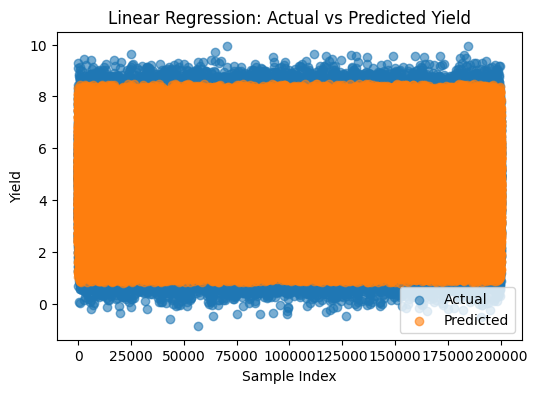

In [16]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted Yield
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(y_test_pred)), y_test_pred, label="Predicted", alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Yield")
plt.title("Linear Regression: Actual vs Predicted Yield")
plt.legend()
plt.show()


In [17]:
# After fitting scaler in Task 1
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [18]:
import joblib
import numpy as np
import pandas as pd

# Load saved model
best_model = joblib.load('best_yield_model.pkl')

# Load saved scaler
scaler = joblib.load('scaler.pkl')

# Example predict function
def predict_yield(single_input: dict):
    """
    single_input: dictionary of input features
    e.g., {'Rainfall_mm': 120, 'Temperature_Celsius': 25, 'Fertilizer_Used': 50, ...}
    """
    # Convert to DataFrame
    input_df = pd.DataFrame([single_input])

    # Encode categorical columns if needed (must match your training encoding)
    input_df = pd.get_dummies(input_df)

    # Add missing columns (set 0 for missing dummy columns)
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match training
    input_df = input_df[X.columns]

    # Scale numeric features
    numeric_features = ['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Days_to_Harvest']
    input_df[numeric_features] = scaler.transform(input_df[numeric_features])

    # Predict
    prediction = best_model.predict(input_df)
    return prediction[0]


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on SCALED data
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)

# Test
y_pred = best_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")

# Verify features
print(f"\nModel trained with {len(X_train.columns)} features:")
for i, feat in enumerate(X_train.columns, 1):
    print(f"{i}. {feat}")

# Save model and scaler to API folder
joblib.dump(best_model, r'C:\Users\highe\Downloads\LRM\linear_regression_model\summative\API\best_yield_model.pkl')
joblib.dump(scaler, r'C:\Users\highe\Downloads\LRM\linear_regression_model\summative\API\scaler.pkl')



R² Score: 0.9130
MSE: 0.2508

Model trained with 20 features:
1. Rainfall_mm
2. Temperature_Celsius
3. Fertilizer_Used
4. Irrigation_Used
5. Days_to_Harvest
6. Region_North
7. Region_South
8. Region_West
9. Soil_Type_Clay
10. Soil_Type_Loam
11. Soil_Type_Peaty
12. Soil_Type_Sandy
13. Soil_Type_Silt
14. Crop_Cotton
15. Crop_Maize
16. Crop_Rice
17. Crop_Soybean
18. Crop_Wheat
19. Weather_Condition_Rainy
20. Weather_Condition_Sunny


['C:\\Users\\highe\\Downloads\\LRM\\linear_regression_model\\summative\\API\\scaler.pkl']

In [20]:
import joblib

# Save model
joblib.dump(best_model, 'best_yield_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Save feature names
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("✅ All files saved!")


✅ All files saved!


In [21]:
import pandas as pd
import joblib

# Load saved items
model = joblib.load('best_yield_model.pkl')
scaler = joblib.load('scaler.pkl')
feature_names = joblib.load('feature_names.pkl')

def predict_yield(user_input):
    # Convert to DataFrame
    input_df = pd.DataFrame([user_input])

    # Make sure all expected columns exist
    for col in feature_names:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match training order
    input_df = input_df[feature_names]

    # Scale
    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = model.predict(input_scaled)[0]
    return prediction


In [22]:
# Example input (change values to match your features)
test_input = {
    'Rainfall_mm': 120,
    'Temperature_Celsius': 24,
    'Fertilizer_Used': 1,
    'Irrigation_Used': 1,
    'Days_to_Harvest': 95,
    'Region_East': 1,
    'Region_North': 0,
    'Region_South': 0,
    'Region_West': 0,
    'Soil_Type_Clay': 0,
    'Soil_Type_Loam': 1,
    'Soil_Type_Sandy': 0,
    'Soil_Type_Silt': 0,
    'Crop_Barley': 1
}

# Call the function
result = predict_yield(test_input)

print("✅ Predicted Yield:", result)


✅ Predicted Yield: 165.30993738514778
